In [1]:
# Thresholding
import cv2
from pytesseract import Output, pytesseract
import numpy as np
from imutils.object_detection import non_max_suppression
from PIL import Image
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(tensorflow.__version__)
print(pd.__version__)

2.15.0
2.2.0


In [3]:
def display(img, cmap='gray'):
    # fig = plt.figure(figsize=(11.69,8.27)) # A4 사이즈
    fig = plt.figure(figsize=(16.53, 11.69))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [4]:
# MNIST
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [5]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
train_labels.shape, test_labels.shape

((60000,), (10000,))

In [7]:
train_data[0].shape

(28, 28)

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

In [10]:
digits_data, digits_data.shape

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [11]:
digits_labels, digits_labels.shape

(array([5, 0, 4, ..., 4, 5, 6], dtype=uint8), (70000,))

Text(0.5, 1.0, 'Class: 3')

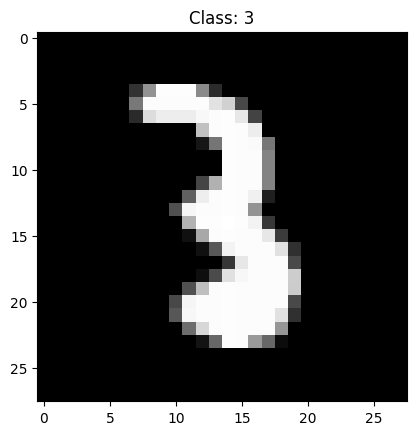

In [12]:
index = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[index], cmap='gray')
plt.title(f'Class: {str(digits_labels[index])}')

In [13]:
# sns.countplot(digits_labels);

In [14]:
# Kaggle A-Z
dataset_az = pd.read_csv('./OCR_with_Python/Models/A_Z Handwritten Data.csv').astype('float32')

In [87]:
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
alphabet_data = dataset_az.drop('0', axis=1)


In [83]:
alphabet_data


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [84]:
alphabet_labels = dataset_az['0']

In [88]:
alphabet_data.shape, alphabet_labels.shape, alphabet_labels.shape[0]

((372450, 28, 28), (372450,), 372450)

In [18]:
alphabet_data

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
alphabet_labels

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
372445    25.0
372446    25.0
372447    25.0
372448    25.0
372449    25.0
Name: 0, Length: 372450, dtype: float32

In [20]:
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))

In [21]:
alphabet_data[0].shape

(28, 28)

In [22]:
alphabet_data.shape

(372450, 28, 28)

Text(0.5, 1.0, 'Class: 20.0')

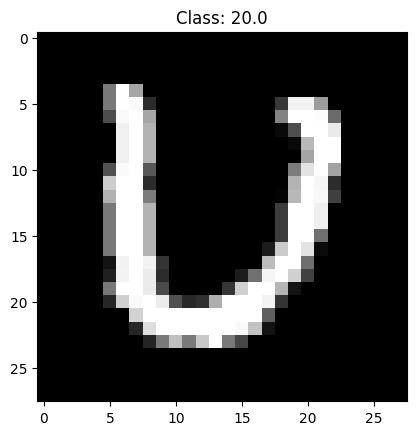

In [23]:
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap='gray')
plt.title(f'Class: {str(alphabet_labels[index])}')

In [24]:
# Joining the datasets
digits_labels, np.unique(digits_labels)

(array([5, 0, 4, ..., 4, 5, 6], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [25]:
alphabet_labels, np.unique(alphabet_labels)

(0          0.0
 1          0.0
 2          0.0
 3          0.0
 4          0.0
           ... 
 372445    25.0
 372446    25.0
 372447    25.0
 372448    25.0
 372449    25.0
 Name: 0, Length: 372450, dtype: float32,
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
       dtype=float32))

In [26]:
alphabet_labels += 10 # 숫자와 합치기 위해 10만큼 이동함.
alphabet_labels, np.unique(alphabet_labels)

(0         10.0
 1         10.0
 2         10.0
 3         10.0
 4         10.0
           ... 
 372445    35.0
 372446    35.0
 372447    35.0
 372448    35.0
 372449    35.0
 Name: 0, Length: 372450, dtype: float32,
 array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
        23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
       dtype=float32))

In [27]:
data = np.vstack([alphabet_data, digits_data]) # 데이터는 백터값이므로 세로방향으로 합침.(Stack함)
labels = np.hstack([alphabet_labels, digits_labels]) # digits_labels에 가로방향으로 alphabet_labels를 합침(Stack함)

In [28]:
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [29]:
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [30]:
data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [31]:
data = np.array(data, dtype='float32')

In [32]:
data.shape

(442450, 28, 28)

In [33]:
data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [34]:
data = np.expand_dims(data, axis=-1)

In [35]:
data.shape

(442450, 28, 28, 1)

In [36]:
# [ 442450개
#     [ 28개
#         [ 28개
#             [] 1개
#         ]
#     ]
# ]

In [37]:
# Pre-processing the data

data[0].min(), data[0].max()

(0.0, 255.0)

In [38]:
data /= 255.0

data[0].min(), data[0].max()

(0.0, 1.0)

In [39]:
np.unique(labels), len(np.unique(labels)) # softmax

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32),
 36)

In [40]:
labels

array([10., 10., 10., ...,  4.,  5.,  6.], dtype=float32)

In [41]:
le = LabelBinarizer()
labels = le.fit_transform(labels) # 중복제거 후 labels의 개수만큼 0과 1로 채움 예)ABC012 => 100000(A), 010000(B), 001000(C) ...
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [42]:
np.unique(labels)

array([0, 1])

In [43]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [44]:
labels[0], len(labels[0])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 36)

In [45]:
labels[3000], labels[3000].shape

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 (36,))

In [46]:
# OneHotEncoder
# A, B, C
# 0, 1, 2

# A, B, C
# 1, 0, 0
# 0, 1, 0
# 0, 0, 1

Text(0.5, 1.0, 'Class: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

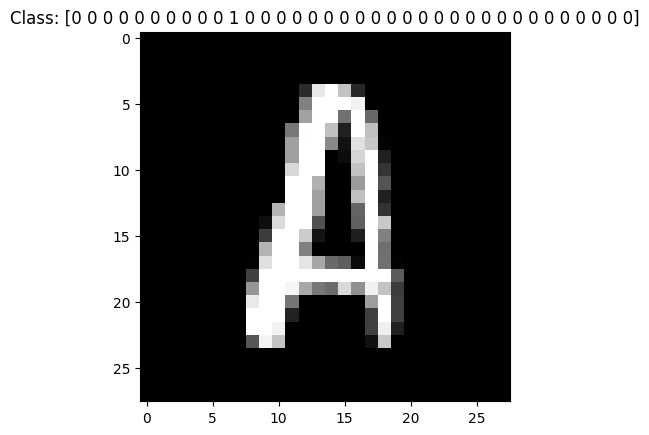

In [47]:
# index = np.random.randint(0, data.shape[0])
plt.imshow(data[37].reshape(28,28), cmap='gray')
plt.title(f'Class: {str(labels[37])}')

In [48]:
labels


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [49]:
classes_total = labels.sum(axis = 0) # 각 문자의 개수를 모두 더함.
classes_total   # 알파벳 O가 트레이닝 개수가 가장 많음.

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [50]:
classes_total.max()

57825

In [51]:
classes_weight = {}
for i in range(0, len(classes_total)):
    # print(i)
    classes_weight[i] = classes_total.max() / classes_total[i]
classes_weight

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

In [52]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1, stratify=labels)
x_train.shape, x_test.shape

((353960, 28, 28, 1), (88490, 28, 28, 1))

In [53]:
y_train.shape, y_test.shape

((353960, 36), (88490, 36))

In [54]:
augumentation = ImageDataGenerator(rotation_range=10, zoom_range=0.05, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=False)

In [55]:
# Building the neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [56]:
network = Sequential()

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')) # same: 검색 할 때 모자라면 0으로 채움
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')) # same: 검색 할 때 모자라면 0으로 채움
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

# Dense Layer
network.add(Dense(64, activation='relu'))
network.add(Dense(128, activation='relu'))

network.add(Dense(36, activation='softmax'))

network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 128)         0

In [58]:
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]
name_labels

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [59]:
# Trainnig the neural network
file_model = 'custom_ocr.model'

# 전체 dataset을 20번 반복하여 학습한다
epochs = 20
# batch: dataset을 작은 그룹, batch_size: batch의 개수
batch_size = 128
# 예) 이미지 50장을 학습시킨다고 할때, 50장을 한번에 학습시키기엔 너무 많아 10장씩 5번 학습시켰다고 했을 때. 이미지 1장은 1 batch
# batch_size = 10, iteration = 5, batch_size * iteration = 1 epochs, (batch_size*iteration)*20 = 20 epochs

In [60]:
checkpointer = ModelCheckpoint(file_model, monitor='val_loss', verbose=1, save_best_only=True)

In [61]:
len(x_train), batch_size, len(x_train) // batch_size

(353960, 128, 2765)

In [62]:
history = network.fit(
    augumentation.flow(x_train, y_train, batch_size=batch_size),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs,
    class_weight=classes_weight,
    verbose=1,
    callbacks=[checkpointer]
)

Epoch 1/20


2763/2765 [============================>.] - ETA: 0s - loss: 1.9750 - accuracy: 0.8381
Epoch 1: val_loss improved from inf to 0.21814, saving model to custom_ocr.model
INFO:tensorflow:Assets written to: custom_ocr.model\assets


INFO:tensorflow:Assets written to: custom_ocr.model\assets


2765/2765 [==============================] - 50s 18ms/step - loss: 1.9744 - accuracy: 0.8382 - val_loss: 0.2181 - val_accuracy: 0.9224
Epoch 2/20
2762/2765 [============================>.] - ETA: 0s - loss: 0.9027 - accuracy: 0.9065
Epoch 2: val_loss did not improve from 0.21814
2765/2765 [==============================] - 49s 18ms/step - loss: 0.9024 - accuracy: 0.9066 - val_loss: 0.2280 - val_accuracy: 0.9057
Epoch 3/20
2762/2765 [============================>.] - ETA: 0s - loss: 0.7712 - accuracy: 0.9168
Epoch 3: val_loss did not improve from 0.21814
2765/2765 [==============================] - 48s 18ms/step - loss: 0.7710 - accuracy: 0.9168 - val_loss: 0.2754 - val_accuracy: 0.8758
Epoch 4/20
2762/2765 [============================>.] - ETA: 0s - loss: 0.6852 - accuracy: 0.9241
Epoch 4: val_loss improved from 0.21814 to 0.21319, saving model to custom_ocr.model
INFO:tensorflow:Assets written to: custom_ocr.model\assets


INFO:tensorflow:Assets written to: custom_ocr.model\assets


2765/2765 [==============================] - 50s 18ms/step - loss: 0.6851 - accuracy: 0.9241 - val_loss: 0.2132 - val_accuracy: 0.9104
Epoch 5/20
2763/2765 [============================>.] - ETA: 0s - loss: 0.6418 - accuracy: 0.9283
Epoch 5: val_loss did not improve from 0.21319
2765/2765 [==============================] - 49s 18ms/step - loss: 0.6418 - accuracy: 0.9283 - val_loss: 0.2330 - val_accuracy: 0.8967
Epoch 6/20
2763/2765 [============================>.] - ETA: 0s - loss: 0.5928 - accuracy: 0.9315
Epoch 6: val_loss did not improve from 0.21319
2765/2765 [==============================] - 50s 18ms/step - loss: 0.5927 - accuracy: 0.9315 - val_loss: 0.2176 - val_accuracy: 0.9073
Epoch 7/20
2763/2765 [============================>.] - ETA: 0s - loss: 0.5561 - accuracy: 0.9356
Epoch 7: val_loss did not improve from 0.21319
2765/2765 [==============================] - 50s 18ms/step - loss: 0.5561 - accuracy: 0.9356 - val_loss: 0.3432 - val_accuracy: 0.8636
Epoch 8/20
2765/2765 [===

INFO:tensorflow:Assets written to: custom_ocr.model\assets


2765/2765 [==============================] - 51s 18ms/step - loss: 0.4678 - accuracy: 0.9419 - val_loss: 0.1689 - val_accuracy: 0.9357
Epoch 13/20
2762/2765 [============================>.] - ETA: 0s - loss: 0.4479 - accuracy: 0.9437
Epoch 13: val_loss did not improve from 0.16890
2765/2765 [==============================] - 50s 18ms/step - loss: 0.4479 - accuracy: 0.9437 - val_loss: 0.1826 - val_accuracy: 0.9180
Epoch 14/20
2765/2765 [==============================] - ETA: 0s - loss: 0.4511 - accuracy: 0.9444
Epoch 14: val_loss did not improve from 0.16890
2765/2765 [==============================] - 50s 18ms/step - loss: 0.4511 - accuracy: 0.9444 - val_loss: 0.1861 - val_accuracy: 0.9175
Epoch 15/20
2763/2765 [============================>.] - ETA: 0s - loss: 0.4350 - accuracy: 0.9459
Epoch 15: val_loss improved from 0.16890 to 0.16885, saving model to custom_ocr.model
INFO:tensorflow:Assets written to: custom_ocr.model\assets


INFO:tensorflow:Assets written to: custom_ocr.model\assets


2765/2765 [==============================] - 51s 18ms/step - loss: 0.4350 - accuracy: 0.9459 - val_loss: 0.1689 - val_accuracy: 0.9417
Epoch 16/20
2765/2765 [==============================] - ETA: 0s - loss: 0.4180 - accuracy: 0.9480
Epoch 16: val_loss improved from 0.16885 to 0.16617, saving model to custom_ocr.model
INFO:tensorflow:Assets written to: custom_ocr.model\assets


INFO:tensorflow:Assets written to: custom_ocr.model\assets


2765/2765 [==============================] - 50s 18ms/step - loss: 0.4180 - accuracy: 0.9480 - val_loss: 0.1662 - val_accuracy: 0.9376
Epoch 17/20
2762/2765 [============================>.] - ETA: 0s - loss: 0.4157 - accuracy: 0.9486
Epoch 17: val_loss improved from 0.16617 to 0.14856, saving model to custom_ocr.model
INFO:tensorflow:Assets written to: custom_ocr.model\assets


INFO:tensorflow:Assets written to: custom_ocr.model\assets


2765/2765 [==============================] - 50s 18ms/step - loss: 0.4157 - accuracy: 0.9486 - val_loss: 0.1486 - val_accuracy: 0.9522
Epoch 18/20
2762/2765 [============================>.] - ETA: 0s - loss: 0.4153 - accuracy: 0.9487
Epoch 18: val_loss did not improve from 0.14856
2765/2765 [==============================] - 50s 18ms/step - loss: 0.4155 - accuracy: 0.9487 - val_loss: 0.1679 - val_accuracy: 0.9329
Epoch 19/20
2763/2765 [============================>.] - ETA: 0s - loss: 0.4013 - accuracy: 0.9507
Epoch 19: val_loss improved from 0.14856 to 0.14494, saving model to custom_ocr.model
INFO:tensorflow:Assets written to: custom_ocr.model\assets


INFO:tensorflow:Assets written to: custom_ocr.model\assets


2765/2765 [==============================] - 51s 18ms/step - loss: 0.4012 - accuracy: 0.9507 - val_loss: 0.1449 - val_accuracy: 0.9497
Epoch 20/20
2763/2765 [============================>.] - ETA: 0s - loss: 0.4024 - accuracy: 0.9500
Epoch 20: val_loss did not improve from 0.14494
2765/2765 [==============================] - 50s 18ms/step - loss: 0.4023 - accuracy: 0.9500 - val_loss: 0.1451 - val_accuracy: 0.9524


In [63]:
x_test.shape

(88490, 28, 28, 1)

In [64]:
predictions = network.predict(x_test, batch_size=batch_size)

692/692 [==============================] - 3s 4ms/step


In [65]:
predictions

array([[3.04732144e-01, 1.90017559e-07, 8.92070148e-06, ...,
        1.82446940e-11, 7.98517976e-06, 6.95162194e-09],
       [2.90165992e-25, 4.70305002e-12, 2.25742493e-13, ...,
        1.36099560e-13, 2.85157553e-12, 1.03243046e-10],
       [1.07104335e-14, 4.19886402e-13, 8.35348445e-16, ...,
        1.13962563e-11, 3.24851639e-11, 1.28333052e-19],
       ...,
       [4.17243034e-01, 4.20666257e-09, 2.37632463e-07, ...,
        6.76916070e-14, 1.15124465e-07, 1.00313844e-12],
       [2.84789156e-31, 2.84602092e-10, 1.69569532e-08, ...,
        9.99868274e-01, 1.08265980e-04, 1.86657401e-09],
       [1.85365445e-10, 1.27356418e-18, 5.39310263e-12, ...,
        4.79003626e-33, 1.18238049e-15, 1.34645289e-15]], dtype=float32)

In [98]:
predictions[0]

array([3.0473214e-01, 1.9001756e-07, 8.9207015e-06, 1.1791109e-06,
       9.6094567e-08, 1.5349649e-05, 2.8990697e-05, 4.0039847e-08,
       7.1849931e-06, 1.6258747e-06, 2.5425172e-07, 2.4777884e-05,
       1.5363803e-04, 1.0916716e-02, 1.3318248e-07, 1.8569812e-13,
       8.7276479e-05, 4.8171785e-08, 6.9073899e-11, 2.5692504e-04,
       7.5286508e-08, 1.4102799e-06, 1.3511939e-07, 3.4233904e-05,
       6.8079144e-01, 1.0350856e-04, 2.3251264e-03, 7.1439757e-08,
       6.0963623e-05, 1.4674691e-06, 4.3648525e-04, 3.1994782e-12,
       1.6427009e-06, 1.8244694e-11, 7.9851798e-06, 6.9516219e-09],
      dtype=float32)

In [82]:
print(len(predictions[0]))
print(len(predictions))

36
88490


In [75]:
np.argmax(predictions[0])

24

In [100]:
name_labels

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

O
F


Text(0.5, 1.0, 'Class: O')

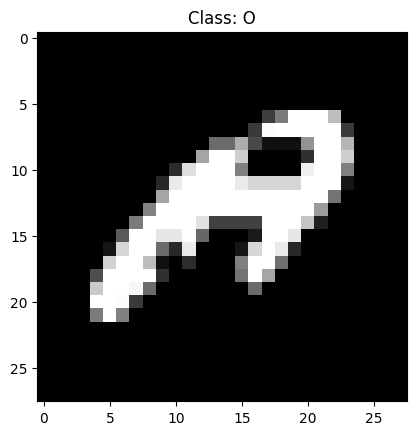

In [99]:
print(name_labels[np.argmax(predictions[0])])
print(name_labels[np.argmin(predictions[0])])

plt.imshow(x_test[np.argmax(predictions[0])].reshape(28,28), cmap='gray')
plt.title(f'Class: {str(name_labels[np.argmax(predictions[0])])}')

In [77]:
y_test[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [78]:
np.argmax(y_test[0])

24

In [101]:
print(name_labels[np.argmax(y_test[0])])

O


In [102]:
network.evaluate(x_test, y_test)

2766/2766 [==============================] - 5s 2ms/step - loss: 0.1451 - accuracy: 0.9524


[0.14505475759506226, 0.9524465799331665]

In [103]:
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=name_labels))

              precision    recall  f1-score   support

           0       0.43      0.55      0.48      1381
           1       0.98      0.99      0.98      1575
           2       0.92      0.98      0.95      1398
           3       0.95      0.99      0.97      1428
           4       0.95      0.94      0.94      1365
           5       0.57      0.96      0.72      1263
           6       0.94      0.98      0.96      1375
           7       0.95      0.99      0.97      1459
           8       0.96      0.98      0.97      1365
           9       0.97      0.99      0.98      1392
           A       0.99      0.99      0.99      2774
           B       0.98      0.98      0.98      1734
           C       0.99      0.98      0.98      4682
           D       0.90      0.97      0.93      2027
           E       0.98      0.99      0.99      2288
           F       0.96      0.99      0.98       233
           G       0.93      0.97      0.95      1152
           H       0.98    

In [104]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

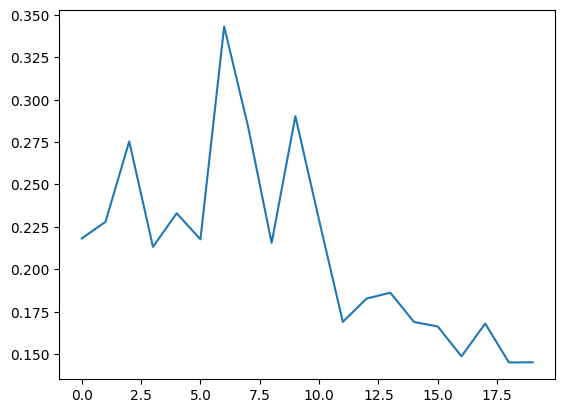

In [105]:
plt.plot(history.history['val_loss'])

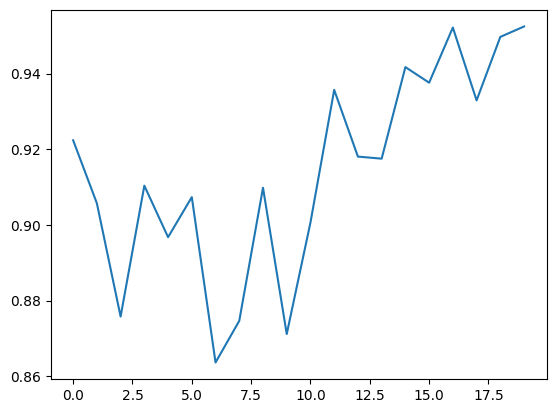

In [106]:
plt.plot(history.history['val_accuracy'])

In [107]:
# Saving the neural network
network.save('network', save_format='h5')

# network라는 이름으로 저장 된 파일을 저장 하면 됨.

f:\WORK_SPACES_JUPYTER\ocr-in-python\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
